In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import logging
from scipy.signal import savgol_filter
import seaborn as sns

In [2]:
def rolling_window(arr, window):
    shape = arr.shape[: -1] + (arr.shape[-1] - window + 1, window)
    strides = arr.strides + (arr.strides[-1], )

    return np.lib.stride_tricks.as_strided(arr, shape=shape, strides=strides)

def save_graph(plots, title='', ylabels=[], footnote='', save_path='test.png'):
    """
    Inputs: list of data to plot e.g. [reward, no_frames]
    """
    f, axarr = plt.subplots(len(plots), sharex=True, figsize=(16, 8 * len(plots)))
    
    axarr[0].set_title(title, fontsize=18)
    axarr[1].set_xlabel('Episode', fontsize=18)
    
    axarr[0].annotate(footnote, (0,0), (0, -10), fontsize=14,
                      xycoords='axes fraction', textcoords='offset points', va='top')
    
    for idx, data in enumerate(plots):

        window = int(len(data) * 0.03)
        window += window % 2 - 1
        poly = 3

        logging.info('Window size:', window)

        data_std = np.std(rolling_window(data, window), 1)
        data_std = np.append(data_std, np.array([data_std[-1]] * (len(data) - len(data_std))))
        data_savgol = savgol_filter(data, window, 3)

        axarr[idx].plot(data_savgol, lw=2.5, color='m')
        
        # Plot standard deviation
        axarr[idx].fill_between(list(range(len(data_std))),
                                data_savgol - data_std,
                                data_savgol + data_std,
                                facecolor='b',
                                alpha=0.2,
                                linewidth=0.0)

        axarr[idx].set_ylabel(ylabels[idx], fontsize=18)
        axarr[idx].set_xlim(0, len(data_std))
    
    f.savefig(save_path, bbox_inches='tight', frameon=True)

(2, 4243)
(4243,)
(4243,)


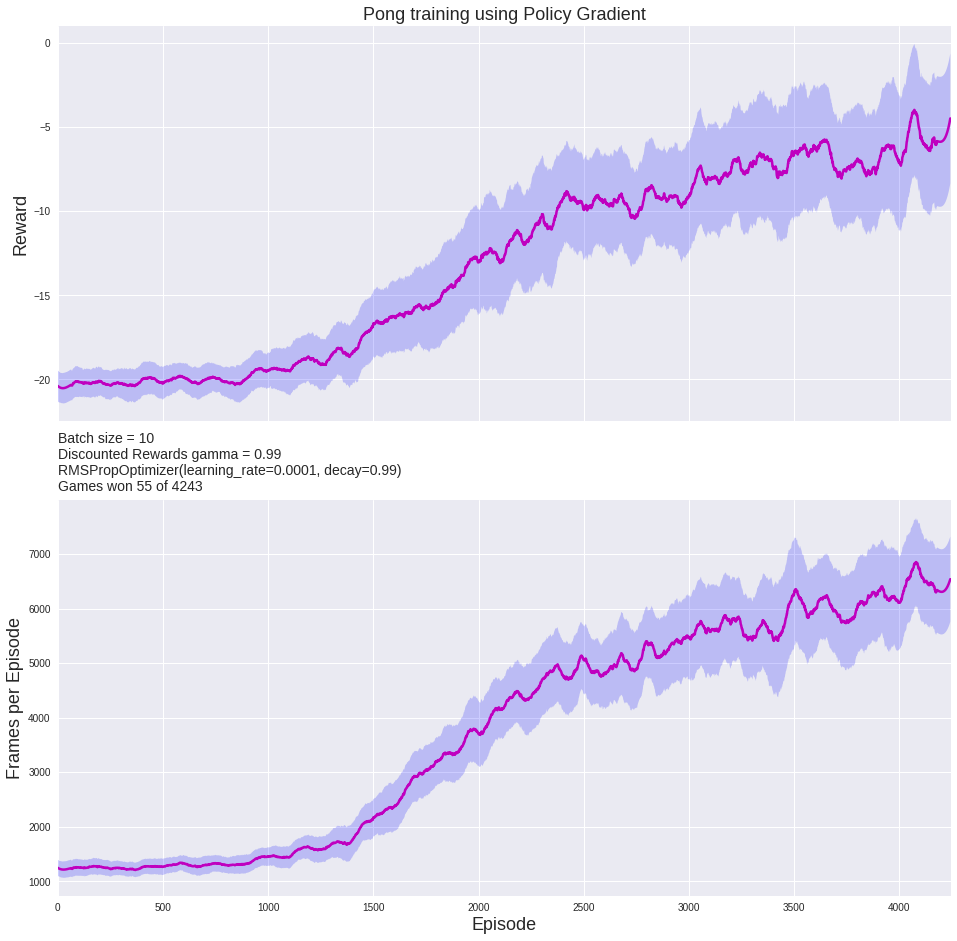

In [12]:
run_name = 'GNWithoutPreproAndWith3ch_LR1e-4_BS10'
batch_size = 10
gamma = 0.99
learning_rate = 0.0001
rmsprop_decay = 0.99

data = np.load('outputs/{}/statistics.npy'.format(run_name))
reward = data[0]
no_frames = data[1]
episodes = len(reward)

print(data.shape)
print(reward.shape)
print(no_frames.shape)

games_won = [1 for rew in reward if rew > 0]

footnote = ("Batch size = {}\nDiscounted Rewards gamma = {}\n"
            "RMSPropOptimizer(learning_rate={}, decay={})\n"
            "Games won {} of {}")

footnote = footnote.format(
    batch_size,
    gamma,
    learning_rate,
    rmsprop_decay,
    len(games_won),
    episodes
)

title = 'Pong training using Policy Gradient'
ylabels = ['Reward', 'Frames per Episode']
save_graph(
    [reward, no_frames],
    title=title,
    ylabels=ylabels,
    footnote=footnote,
    save_path='outputs/{}/pong_pg_results.png'.format(run_name)
)

(2, 17651)
(17651,)
(17651,)


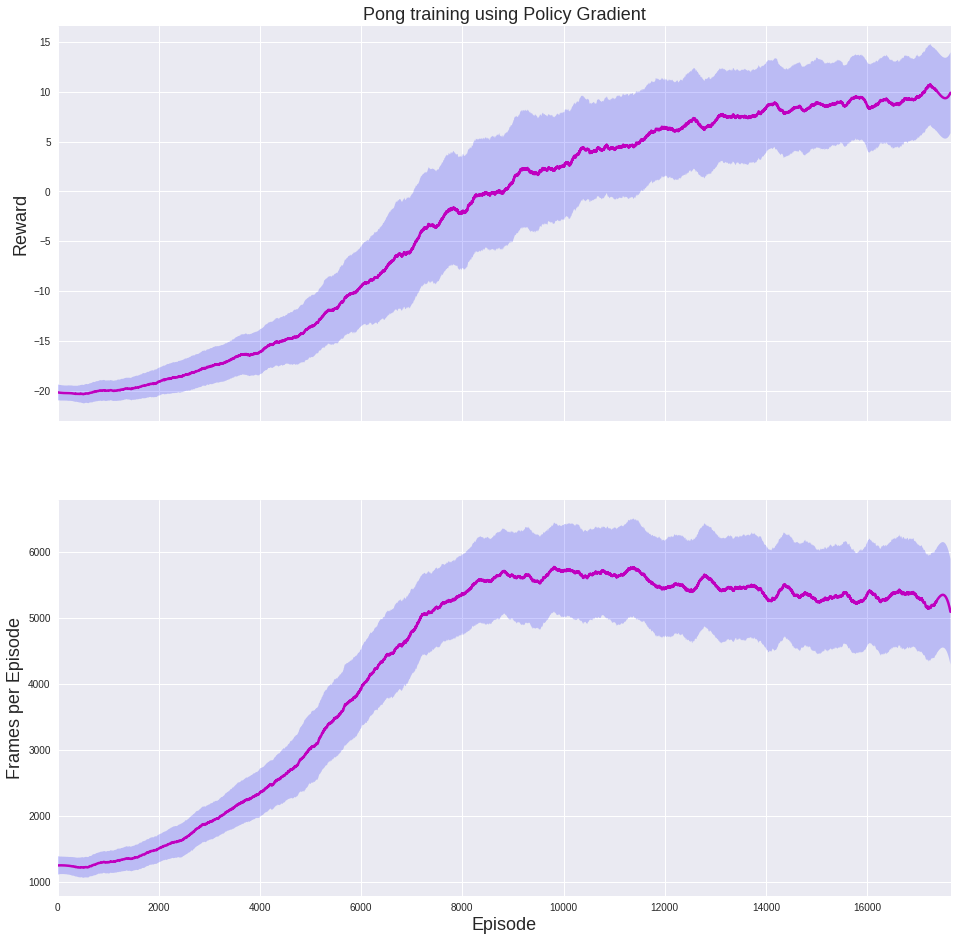

In [4]:
run_name = 'Tf_sampling_and_reduce_sum'
data = np.load('outputs/{}/statistics.npy'.format(run_name))
reward = data[0]
no_frames = data[1]

print(data.shape)
print(reward.shape)
print(no_frames.shape)

title = 'Pong training using Policy Gradient'
ylabels = ['Reward', 'Frames per Episode']
save_graph([reward, no_frames], title=title, ylabels=ylabels, 
           save_path='outputs/{}/pong_pg_results.png'.format(run_name))

(2, 4574)
(4574,)
(4574,)


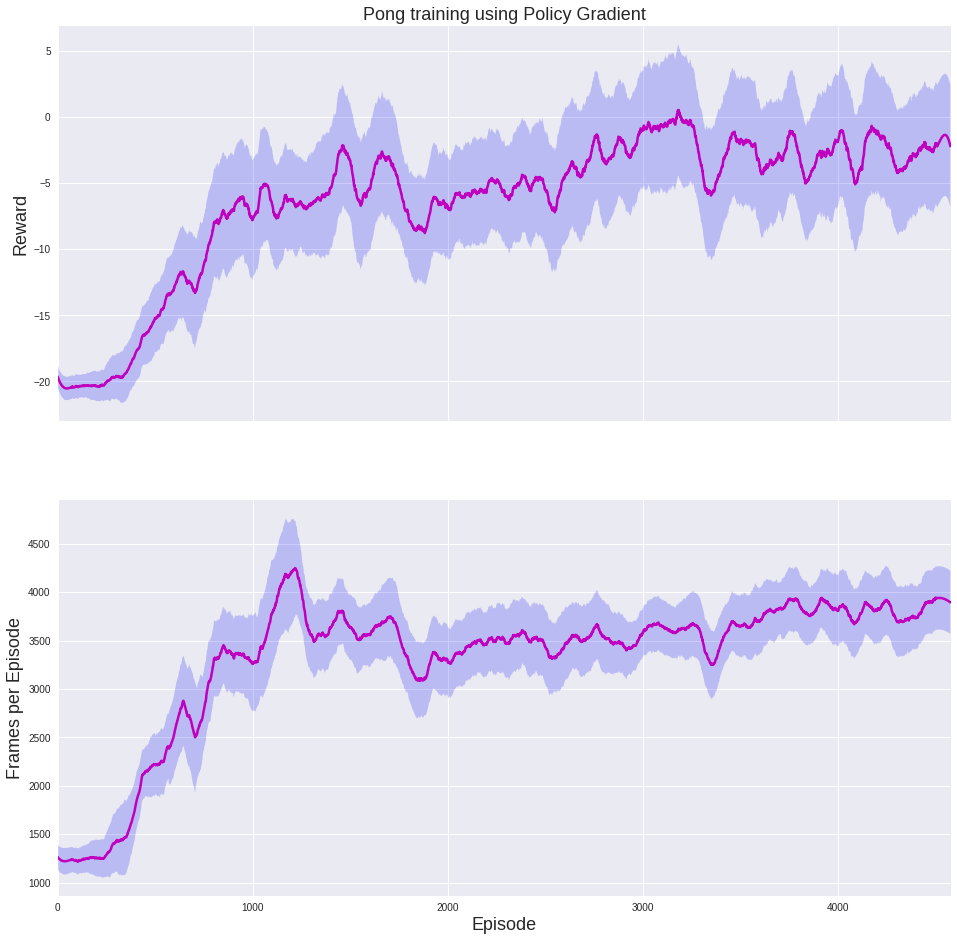

In [5]:
run_name = 'GuntisNetWithoutCropAndBinarization'
data = np.load('outputs/{}/statistics.npy'.format(run_name))
reward = data[0]
no_frames = data[1]

print(data.shape)
print(reward.shape)
print(no_frames.shape)

title = 'Pong training using Policy Gradient'
ylabels = ['Reward', 'Frames per Episode']
save_graph([reward, no_frames], title=title, ylabels=ylabels, 
           save_path='outputs/{}/pong_pg_results.png'.format(run_name))